<img src="email_signature_168.png">

***
# Quickdive - Machine Learning (ML)
## München, 2020     
***

Willkommen in **Ihrem persönlichen Jupyter-Notebook**.
  
Sie können in diesem Notebook alle Beispiele live nachvollziehen, aber auch eigene Varianten ausprobieren.  
In der Menüleiste finden sich die wichtigsten Funktionen für "Maus"-User.  
Hier noch einige sehr hilfreiche Tastatur-Kürzel für effizientes Arbeiten mit der Tastatur:

* **Ausführen/Run** einer Zelle mit ... [SHIFT+ENTER]
* Eine neue leere Zelle **über** einer Zelle einfügen mit ... [a] 
* Eine neue leere Zelle **unter** einer Zelle einfügen mit ... [b]
* Eine Zelle **löschen/entfernen** !!VORSICHT!! mit ... [dd]
* Eine Zelle in **Markdown-Format** umwandeln mit ... [m]
* Eine Zelle in **Coding-Format** umwandeln mit ... [y]

Diesen Code müssen wir am Anfang IMMER ausführen:

In [1]:
%matplotlib inline

# Grundausstattung an Bibliotheken, die wir immer laden
import numpy as np                  # Numerische Operationen, Lineare Algebra
from scipy.stats import *           # Funktionsbibliothek mit statistischen Funktionen
import matplotlib.pyplot as plt     # Funktionsbilio<thek zur Visualisierung von Daten/Ergebnissen
import pandas as pd                 # Bearbeitung von tabellarischen Daten (sog. Data Frames)
import seaborn as sns               # Erweiterte Visualisierung von Daten/Ergebnissen etc.
import warnings                     # Ermöglicht die Deaktivierung von best. Warnmeldungen
import random                       # Damit kann man Zufallszahlen generieren
import os                           # Ermöglicht Zugriff auf das Dateiablagesystem 
import datetime as dt               # Funktionsbiliothek zum Arbeiten mit Zeitreihen Daten
import pickle                       # Ermöglicht das Abspeichern von Objekten (z.B. trainierten Modellen)

# Ein paar Einstellungen, die einem das Leben einfacher machen
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [8, 4]
plt.style.use('seaborn-white')
from IPython.core.pylabtools import figsize
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
print("Los geht's ...")

Los geht's ...


#### *Fehlende Werte*
... heißen in Python meistens "NA" (oder nan). Viele ML Algorithmen funktioneren nicht mit NA Werten im Datenset.  
Welche Strategien kann man anwenden?  
+ Löschen von einzelnen Datensätzen mit NA Werten
+ Löschen von einzelnen Merkmalen (Feature) mit NA Werten
+ NA Werte durch Schätzwerte ersetzen => Mittelwert, Median, Modus, Max-Wert, Min-Wert, individueller Wert, Regressionsmodell lernen

Wie sieht es in unserem Datenset aus?  
Welche Merkmale haben NA und wieviele davon?

In [2]:
cars.isna().sum()
# oder prozentual:  
# cars.isna().mean()

NameError: name 'cars' is not defined

Da uns prozentual nur wenige Werte fehlen, können wir sie bedenkenlos mit dem jeweiligen Mittelwert oder Median des Merkmals ersetzen

In [ ]:
cars = cars.fillna(cars.mean())   # alternativ mit .median()

Sind jetzt alle fehlenden Werte ersetzt worden?

In [ ]:
# OK, dann kümmern wir uns noch um das nicht-numerische Merkaml "country"
cars.country = cars.country.fillna("MISSING")

Verteilung des Merkmals "country"

In [ ]:
cars.country.value_counts()

#### *Kategorielle alphanumerische Daten umwandeln*
Sehr viele ML Algorithmen (fast alle in der Bibliothek Scikit-Learn) können nur numerische Daten verarbeiten.  
In der Praxis sind kategorielle Merkmale aber häufig alphanumerisch: Farbe, Geschlecht, Hersteller, Modell, Land ...  
Wenn man diese Merkmale als Feature nutzen möchte, muss man sie in eine numerische Form encoden:
  
Zwei gängige Methoden dafür sind "Label Encoding" und "One Hot Encoding".  

OH Encoding hat ggü. Label Encoding einen entscheidenden Vorteil:  
Label Encoding stellt eine (häufig nicht real existierende) Logik bzw. Rangfolge zwischen den Merkmalen her:  
Label Encoding unseres Merkmals Country führt zu: (0, US), (1, Europe), (2, Japan). Ist Japan > Europe > US ??    
Beim OH Encoding hingegen werden die Merkmale transformiert, ohne dass eine ungewollte Rangfolge der Ausprägungen ensteht.

Wir transformieren also unser Feature "colour" mit dem OH-Encoder:

In [ ]:
cars_target = cars.country.copy()          # Brauchen wir später noch ...

# Jetzt transformieren wir cars mit "One Hot Encoding"
cars = pd.get_dummies(cars, )
cars.sample(4)

#### *Daten normalisieren/standardisieren*
Sehr viele Algorithmen nutzen mathematische Distanzmaße wie z.B. den Abstand eines Datenpunktes vom Mittelwert.  
Wenn die einzelnen Feature in ihren Ausprägungen unterschiedlich stark skalieren (z.B. Anzahl Zylinder und PS)  
dann "verzerren" diese unterschiedlichen Skalen die Ergebnisse des Algorithmus.

Lösungsstrategie: Einheitliche Skalierung der Daten, d.h. man standardisiert sie.  
Schauen wir uns die statistischen Eckwerte (Lageparameter) unserer numerischen Feature an:

In [ ]:
feat_num = ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60']   # Liste feat_num := Vereinfacht die Adressierung
cars.loc[:, feat_num].describe()[1:3]

Wir standardisieren unsere Daten mit der sog. Z-Score Methode (Normalisierung)  
Die Funktionsbibliothek Scikit-Learn (ML Methoden) bietet dafür eine geeignete Methode an.

In [ ]:
from sklearn.preprocessing import StandardScaler    # importieren des Tools aus scikit-learn

X = cars.copy()                        # jetzt wandeln wir unseren Dataframe in eine Datenmatrix X um
X = X[feat_num]                        # wir skalieren nur die ersten 6 Feature (nicht das Jahr und die Länder)

scaler = StandardScaler().fit(X)       # Trainiert den Scaler auf die Datenmatrix
X = scaler.transform(X)                # Transformiert Datenmatrix X

print("Ursprungsformat der Daten:\n")
print(cars.loc[:4,feat_num])           # Ausgabe der ersten 5 Datensätze des Cars Datensets
print()
print(80*"-")
print("Standardisierte Version der Daten (erste 5 Zeilen):")
for i in X[:5]: print("\n",i)          # Pretty Printing der ersten 5 transformierten Datensätze


***
Nach der Exploration und Vorbereitung unserer Daten wenden wir uns jetzt dem ML zu:

***
## 4. Supervised Learning: Regression
Reminder: Supervised Learning, d.h. Modelle werden **immer anhand der vorhandenen Lerninformation (Target Variable)** trainiert.

### 1 Datenset: BMW-PRICING CHALLENGE

Dafür bearbeiten wir jetzt ein praxisnäheres Beispiel: Das BMW-Pricing Challenge Datenset auf der Plattform KAGGLE  

https://www.kaggle.com/danielkyrka/bmw-pricing-challenge 

Die Autoren dieses Datensets schreiben dazu:

* With this challenge we hope to [...] gain some insight in what the main factors are that drive the value of a used car.  
* The data provided consists of almost 5000 real BMW cars that were sold via a b2b auction in 2018.
* The price shown in the table is the highest bid that was reached during the auction.
* We have also extracted 8 criteria based on the equipment of car that we think might have a good impact on the value of a used car.
* These criteria have been labeled feature1 to feature 8 and are shown in the data below.

In [12]:
# Zunächst laden wir die Rohdaten
bmw = pd.read_csv("bmw_pricing_challenge.csv")

# Beschränkung auf die 20 am häufigsten vorkommenden Modelle
t20_models = bmw.model_key.value_counts()[:20].index.to_list()  # Auslesen der T20 Modellbezeichnungen
bmw = bmw.loc[bmw.model_key.isin(t20_models),:]  

# Die beiden Datums-Merkmale 'sold_at' und 'registration_date' sollten wir besser in ein Datetime-Format konvertieren
bmw.registration_date = pd.to_datetime(bmw.registration_date)
bmw.sold_at = pd.to_datetime(bmw.sold_at)

# Neue Datums-Features ableiten
bmw["period"] = bmw.sold_at - bmw.registration_date   # erstellt Spalte mit Differenz in Tagen
bmw["period"] = bmw.period.dt.days                    # normiert die Differenz in Tageseinheiten
bmw["Sell_Month"] = bmw.sold_at.dt.month              # Der Monat, in dem die Auktion stattfand

bmw.reset_index(inplace=True)  
bmw.shape
bmw.sample(3)

(4460, 21)

,index,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,...,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,period,Sell_Month
4066,4404,BMW,X5,181159,225,2010-12-01,diesel,brown,suv,True,...,False,True,True,False,True,True,16800,2018-06-01,2739,6
2825,3094,BMW,520,212590,120,2010-08-01,diesel,grey,sedan,True,...,True,False,False,False,True,True,13200,2018-05-01,2830,5
480,548,BMW,316,29668,85,2014-10-01,diesel,brown,estate,True,...,False,False,True,False,True,True,20300,2018-03-01,1247,3


In [13]:
# Noch ein kurzer Blick auf die Verteilung der numerischen Variablen ...
bmw.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
index,4460.0,2421.2,1395.1,0.0,1193.8,2427.5,3656.2,4842.0
mileage,4460.0,143541.4,58609.9,612.0,106601.5,143750.5,176091.0,1000376.0
engine_power,4460.0,125.2,33.8,0.0,100.0,120.0,135.0,300.0
price,4460.0,15048.0,8300.3,100.0,10700.0,13800.0,17700.0,178500.0
period,4460.0,2003.6,919.0,215.0,1492.0,1795.0,2130.0,10258.0
Sell_Month,4460.0,4.9,2.2,1.0,3.0,5.0,7.0,9.0


Schauen wir uns noch kurz die Verteilung des Fahrzeugalters an:

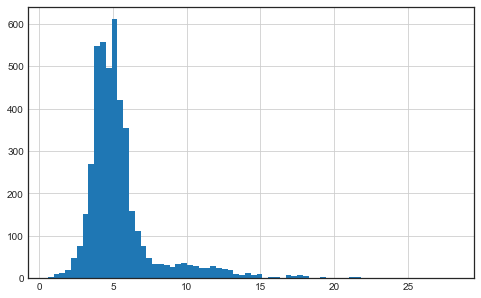

In [14]:
# Verteilung des Fahrzeugalters (in Jahren) im Datenset:
_= (bmw.period/365).hist(bins=70, figsize=(8,5))

Betrachten wir die kategoriellen Features noch etwas genauer: 

Text(0.5, 1.0, 'Verteilung der Fahrzeugpreise nach Modellreihen')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '118'),
  Text(1, 0, '320'),
  Text(2, 0, '420'),
  Text(3, 0, '120'),
  Text(4, 0, '318'),
  Text(5, 0, '330'),
  Text(6, 0, '316'),
  Text(7, 0, '520'),
  Text(8, 0, '525'),
  Text(9, 0, '530'),
  Text(10, 0, '535'),
  Text(11, 0, '320 Gran Turismo'),
  Text(12, 0, '518'),
  Text(13, 0, '116'),
  Text(14, 0, 'X3'),
  Text(15, 0, '318 Gran Turismo'),
  Text(16, 0, 'X5'),
  Text(17, 0, 'X1'),
  Text(18, 0, 'X4'),
  Text(19, 0, 'X6')])

(Text(0.5, 0, 'Modellreihe'), Text(0, 0.5, 'Preis'))

(0.0, 70000.0)

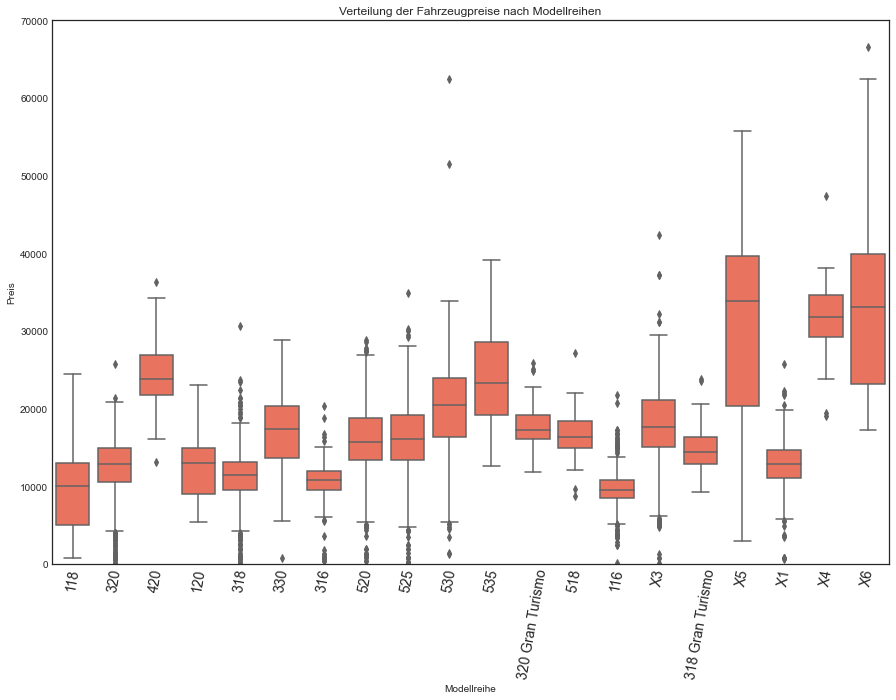

In [15]:
figsize(15,10)
x,y = bmw.model_key, bmw.price
_= sns.boxplot(x, y, data=bmw, color="tomato") 
plt.title("Verteilung der Fahrzeugpreise nach Modellreihen")
plt.xticks(fontsize=14, rotation=80); plt.xlabel("Modellreihe"), plt.ylabel("Preis"); plt.ylim(0,70_000)

plt.show()

### 4.2 Lineare Regression

Jetzt bauen wir unsere Datenmatrix auf, auf der wir dann das Regressionsmodell trainieren wollen.  

In [17]:
features = ['model_key', 'mileage', 'engine_power','fuel', 'paint_color', 'car_type',
            'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
            'period', 'Sell_Month', ]


X = bmw[features].copy()
y = bmw.price.copy()

##### (3) & (4) OH-Encoding und Standardisieren

# Wir importieren die Preprocessing Tools aus Scikit-Learn

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler   # Unsere Werkzeuge

# Wir legen ein paar Listen an, um das PreProcessing zu erleichtern
feat_cat = ["model_key", "fuel", "paint_color", "car_type", ] 
feat_num = ['mileage', 'engine_power', 'period',]
feat_bool = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6','feature_7', 'feature_8']
feat_other = ['Sell_Month']

# Jetzt vereinzeln wir die Matrix X in vier Teil-Matrizen 
Xcat   = X[feat_cat].copy()
Xnum   = X[feat_num].copy()
Xbool  = X[feat_bool].copy()
Xother = X[feat_other].copy()

# OH-Encoding auf der Matrix mit den kategoriellen Daten
oh = OneHotEncoder(sparse=False)
Xcat = oh.fit_transform(Xcat)
Xcat_cols = oh.get_feature_names(feat_cat)
Xcat = pd.DataFrame(data=Xcat, columns=Xcat_cols)

# Standardisieren auf der Matrix mit den numerischen Daten
scaler = StandardScaler()
Xnum = scaler.fit_transform(Xnum)
Xnum = pd.DataFrame(Xnum, columns=feat_num)

# Zusammenführen der vier Teilmatrizen zu einer Datenmatrix X
X = pd.concat([Xcat, Xnum, Xbool, Xother], axis=1,  )

print(f"Featurematrix X mit {X.shape[0]} Datensätzen und {X.shape[1]} Feature/Variablen")
print(f"Targetvektor y mit {y.shape[0]} Datensätzen")

Featurematrix X mit 4460 Datensätzen und 53 Feature/Variablen
Targetvektor y mit 4460 Datensätzen


In [18]:
X.head(3)

,model_key_116,model_key_118,model_key_120,model_key_316,model_key_318,model_key_318 Gran Turismo,model_key_320,model_key_320 Gran Turismo,model_key_330,model_key_420,...,period,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,Sell_Month
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.171299,True,True,False,False,True,True,True,False,1
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.139738,False,False,False,False,True,False,True,False,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.753764,True,True,False,False,True,True,True,True,2


##### (5) Trainings- & Testset splitten
Wir splitten in ein Trainingsset mit 70% fürs Training und 30% fürs Testen 

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

##### (6) Lineares Regressionsmodell trainieren 

In [26]:
from sklearn.linear_model import LinearRegression, 

lr = LinearRegression().fit(X_train, y_train)  # Model instanziieren und auf die Trainingsdaten trainieren

scoreTrain = lr.score(X_train, y_train)        # Ermittelt R² Score für Trainingsdaten
scoreTest  = lr.score(X_test, y_test)           # Ermittelt den R² für die Testdaten

print("-"*65)
print(f"Anteil der erklärbaren Varianz, R² auf dem Trainingsset  = {scoreTrain:.2f}")
print(f"Anteil der erklärbaren Varianz, R² auf den TESTDATEN (!) = {scoreTest:.2f}")
print("-"*65)

-----------------------------------------------------------------
Anteil der erklärbaren Varianz, R² auf dem Trainingsset  = 0.72
Anteil der erklärbaren Varianz, R² auf den TESTDATEN (!) = 0.70
-----------------------------------------------------------------


In [28]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor().fit(X_train, y_train)  # Model instanziieren und auf die Trainingsdaten trainieren

scoreTrain = sgd.score(X_train, y_train)        # Ermittelt R² Score für Trainingsdaten
scoreTest  = sgd.score(X_test, y_test)           # Ermittelt den R² für die Testdaten

print("-"*65)
print(f"Anteil der erklärbaren Varianz, R² auf dem Trainingsset  = {scoreTrain:.2f}")
print(f"Anteil der erklärbaren Varianz, R² auf den TESTDATEN (!) = {scoreTest:.2f}")
print("-"*65)

-----------------------------------------------------------------
Anteil der erklärbaren Varianz, R² auf dem Trainingsset  = 0.71
Anteil der erklärbaren Varianz, R² auf den TESTDATEN (!) = 0.69
-----------------------------------------------------------------


In [23]:
# Ausgabe der einzelnen Faktoren mit ihren Gewichten in der Regression:
weights = pd.Series(lr.coef_, index=X.columns.to_list(),)
weights.sort_values(ascending=False)[:50]

model_key_X6                  4.760935e+15
model_key_X5                  4.760935e+15
model_key_X4                  4.760935e+15
model_key_420                 4.760935e+15
model_key_535                 4.760935e+15
model_key_530                 4.760935e+15
model_key_520                 4.760935e+15
model_key_518                 4.760935e+15
model_key_525                 4.760935e+15
model_key_318 Gran Turismo    4.760935e+15
model_key_320 Gran Turismo    4.760935e+15
model_key_318                 4.760935e+15
model_key_320                 4.760935e+15
model_key_316                 4.760935e+15
model_key_X3                  4.760935e+15
model_key_330                 4.760935e+15
model_key_118                 4.760935e+15
model_key_116                 4.760935e+15
model_key_120                 4.760935e+15
model_key_X1                  4.760935e+15
fuel_hybrid_petrol            3.515312e+03
car_type_suv                  2.786500e+03
car_type_convertible          2.420875e+03
engine_powe

Mit unserem Modell können wir jetzt den Preis für "neue" ungesehene Daten schätzen:  
Zur Vereinfachung ziehen wir uns aus unseren "unberührten" Testdaten ein Sample und lassen es durch unser Modell schätzen:

In [25]:
Size = 5
Sample = X_test.sample(Size, random_state=815)
yreal = pd.Series(y_test[Sample.index])
ypred = pd.Series(lr.predict(Sample), index=Sample.index, name="price_pred").astype("int")
result = pd.concat([ypred,yreal,Sample], axis=1)
result.T

,192,3729,3395,4127,1598
price_pred,9630,12076,10147,36798,350
price,10500,12000,8300,36900,4300
model_key_116,0,0,1,0,0
model_key_118,0,0,0,0,0
model_key_120,0,0,0,0,0
model_key_316,0,0,0,0,0
model_key_318,1,0,0,0,0
model_key_318 Gran Turismo,0,0,0,0,0
model_key_320,0,0,0,0,0
model_key_320 Gran Turismo,0,0,0,0,0


## 5 Supervised Learning: Classification

### 5.1 KAGGLE Competition - "Give Me Some Credit"
https://www.kaggle.com/c/GiveMeSomeCredit/data

Das schreiben die Autoren auf KAGGLE:

*Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted.  
This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.*

*The goal of this competition is to build a model that borrowers can use to help make the best financial decisions.*

Hier eine kurze Beschreibung der einzelnen Variablen:

In [29]:
pd.set_option('display.max_colwidth', -1)
cs_info = pd.read_excel("cs-Data Dictionary.xls", header=1); cs_info

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquency or worse,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days past due but no worse in the last 2 years.,integer
4,DebtRatio,"Monthly debt payments, alimony,living costs divided by monthy gross income",percentage
5,MonthlyIncome,Monthly income,real
6,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards),integer
7,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or more past due.,integer
8,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans including home equity lines of credit,integer
9,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days past due but no worse in the last 2 years.,integer


In [30]:
# Datenset laden
cs = pd.read_csv("cs-training-small.csv")
cs = cs.iloc[:,1:]
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RevolvingUtilizationOfUnsecuredLines  45000 non-null  float64
 1   age                                   45000 non-null  float64
 2   NumberOfTime30-59DaysPastDueNotWorse  45000 non-null  float64
 3   DebtRatio                             45000 non-null  float64
 4   MonthlyIncome                         45000 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       45000 non-null  float64
 6   NumberOfTimes90DaysLate               45000 non-null  float64
 7   NumberRealEstateLoansOrLines          45000 non-null  float64
 8   NumberOfTime60-89DaysPastDueNotWorse  45000 non-null  float64
 9   NumberOfDependents                    45000 non-null  float64
 10  SeriousDlqin2yrs                      45000 non-null  int64  
dtypes: float64(10),

Jetzt werfen für mal einen Blick auf die Verteilung der Werte der einzelnen Variablen ...

Zumindest die RUULs liefern einen überdurchschnittlichen Erklärungsbeitrag für unser Modell.  
Wir nehmen die auffälligen Merkmale mit in unsere weiteren Überlegungen.  
Jetzt bauen wir unsere Datenmatrix X und unseren Targetvektor y.

In [50]:
cs.SeriousDlqin2yrs.value_counts()
cs.SeriousDlqin2yrs.value_counts(normalize=True).round(3)

0    41992
1    3008 
Name: SeriousDlqin2yrs, dtype: int64

0    0.933
1    0.067
Name: SeriousDlqin2yrs, dtype: float64

In [31]:
X = cs.iloc[:,:-1].copy()
y = cs.iloc[:,-1]
print(X.shape,y.shape)
print(f"Anteil Defaults im gesamten Datenset {y.mean():.3f}")

(45000, 10) (45000,)
Anteil Defaults im gesamten Datenset 0.067


Wir splitten in ein Trainingsset (2/3) und ein Testset (1/3):

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33333, shuffle=True, stratify=y, random_state=123)
print(f' Trainingsset: {X_train.shape, y_train.shape} / Test Set: {X_test.shape, y_test.shape}')

 Trainingsset: ((30000, 10), (30000,)) / Test Set: ((15000, 10), (15000,))


### 5.2 Classification mit Decision Tree Model

In [33]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

model = 'Decision Tree'
t_names = ['Kein Default', 'Default']

estimator = DecisionTreeClassifier(class_weight="balanced", ) # max_depth=5
estimator.fit(X_train, y_train)

ytrue = y_test
ypred = estimator.predict(X_test)

accuracy = accuracy_score(ytrue, ypred)
roc_auc = roc_auc_score(ytrue, ypred)
print(f"Dummy-Baseline Accuracy: {1-y_test.mean()}")
print(f'Accuracy Score: {accuracy:.4f}, AUC: {roc_auc:.4f}')
print("\n",classification_report(ytrue, ypred, target_names=t_names))

# Feature Importance aus Model in Dataframe FI schreiben
fi_data = {'Feature': list(X_train.columns), 'F_Importance': estimator.feature_importances_}
FI = pd.DataFrame(data=fi_data)
FI = FI.sort_values('F_Importance', ascending=False); FI

# Confusion Matrix erstellen
mat = confusion_matrix(ytrue, ypred,)
print("Confusion Matrix:\n",mat)

DecisionTreeClassifier(class_weight='balanced')

Dummy-Baseline Accuracy: 0.9331333333333334
Accuracy Score: 0.8997, AUC: 0.5941

               precision    recall  f1-score   support

Kein Default       0.95      0.95      0.95     13997
     Default       0.25      0.24      0.24      1003

    accuracy                           0.90     15000
   macro avg       0.60      0.59      0.59     15000
weighted avg       0.90      0.90      0.90     15000



,Feature,F_Importance
0,RevolvingUtilizationOfUnsecuredLines,0.342700
3,DebtRatio,0.140931
4,MonthlyIncome,0.125543
1,age,0.106390
2,NumberOfTime30-59DaysPastDueNotWorse,0.083296
5,NumberOfOpenCreditLinesAndLoans,0.069401
6,NumberOfTimes90DaysLate,0.059465
9,NumberOfDependents,0.026140
8,NumberOfTime60-89DaysPastDueNotWorse,0.024313
7,NumberRealEstateLoansOrLines,0.021822


Confusion Matrix:
 [[13253   744]
 [  761   242]]


Wir können uns dazu auch eine Confusion-Matrix plotten:

<AxesSubplot:>

Text(28.5, 0.5, 'Actual')

Text(0.5, 28.5, 'Predicted')

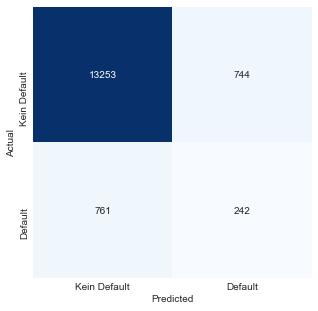

In [44]:
fig, ax = plt.subplots(figsize=(5, 5))
category_names = ["Kein Default", "Default"]
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=category_names, yticklabels=category_names)
plt.ylabel("Actual")
plt.xlabel("Predicted"); plt.show()

Mit ein paar Optimierungen können wir bereits moderate/gute Ergebnisse erzielen.
Nach diesen ersten "Gehversuchen" schicken wir ein paar weitere Modelle ins Rennen:

### 5.3 Classification mit verschiedenen Modellen

Beim Decision Tree Classifier ist es nicht notwendig die Daten zu standardisieren.  
Bei den Modellen, die wir jetzt zusätzlich ins Spiel bringen, könnte es sehr hilfreich sein.  
Wir behalten uns diesen Preprocessing-Schritt noch vor und probieren es zunächst ohne Standardisierung.

In [42]:
# Standardisieren auf der Matrix mit den numerischen Daten
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Wir bauen uns ein Pipeline aus verschiedenen Classifiern, die wir in einem "Durchgang" auf unsere Trainings- und Testdaten anwenden werden.  
Die einzelnen Schritte:

+ Importieren der notwendigen Classifier Alogrithmen u. verschd. Werkzeuge.
+ Instanziierung der einzelnen Algorithmen (so wird ein konkretes Learner-Objekt daraus).
+ Erstellen einer Pipeline (Festlegen, welche Modelle tatsächlich angewendet werden sollen).
+ Anlegen eines Dataframe, um die Ergebnisse der einzelnen Modelle abzuspeichern.
+ Pipeline-Logik: Ruft die vorab defierten Classifier auf u. wendet sie auf X_train u. X_test an.
+ Ausgeben der Ergebnisse aus unserem Dataframe

In [45]:
# Importieren der Classifier Algorithmen, die wir als Kandidaten verwenden möchten:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Importieren von Metriken und Zeitfunktionen
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, classification_report
import time

# Hier sind unsere Classifier Kandidaten Modelle
clf1 = GaussianNB()
# clf2 = SVC(class_weight="balanced",)
clf2 = LinearSVC(class_weight="balanced")
clf3 = LogisticRegression(class_weight="balanced")
clf4 = KNeighborsClassifier()
# Dem Random Forest spendieren wir 3 Varianten ...
clf5 = RandomForestClassifier(class_weight="balanced", n_jobs=-1)
clf6 = RandomForestClassifier(n_estimators = 300, class_weight="balanced", max_depth=3,  bootstrap=True, n_jobs=-1)
clf7 = RandomForestClassifier(n_estimators = 500, class_weight="balanced", max_depth=5,  bootstrap=False, n_jobs=-1)

# Das ist unsere Pipeline die wir durchlaufen
pipeline = [(1, "NB",clf1),
           (2, "LinSVM", clf2),
           (3, "LogReg", clf3),
           (4, "Knn5", clf4),
           (5, "RF", clf5),
           (6, "RF opt1", clf6),
           (7, "RF opt2", clf7),
          ]  
# Wir speichern die "Rundenergebnisse" der einzelnen Classifier in einem Dataframe
results = pd.DataFrame( {"Estimator":[], "Accuracy":[], "Precision":[], "Recall":[], "f1":[], "AUC":[], "Duration":[]} )
models_fitted = []  # Ablegen der gefitteten Modelle (Objekte) in einer Liste

# Durchlauf mehrerer Modelle und Wegschreiben des Ergebnisses
for i, name, estimator in pipeline:
    
    # Model fitten u. in Liste ablegen
    print(f"\nFitting {name} ...")
    start = time.time()                     # Stoppuhr: Zwischenzeit nehmen
    est = estimator.fit(X_train, y_train)   # model aus Listing nehmen und fitten
    models_fitted.append(est)

    # Scorings erstellen
    ytrue = y_test                          # ...
    ypred = est.predict(X_test)             # model auf Testdaten anwenden (predict)
    
    acc = accuracy_score(ytrue, ypred )     # Accuracy 
    prec = precision_score(ytrue, ypred )   # Precision 
    rec = recall_score(ytrue, ypred,  )     # Recall
    f1 = f1_score(ytrue, ypred, )           # f1-Score
    auc = roc_auc_score(ytrue, ypred, )     # AUC
    end = time.time()                       # Stoppuhr: Zwischenzeit nehmen
    duration = end - start                  # Walltime in Variable abspeichern
    
    results.loc[i,:] = [name, acc, prec, rec, f1, auc, duration]
    print(f"\nFitting {name} took {duration:.1f} seconds")
    print("-"*100)
    print()
    
print(f"Dummy-Baseline Accuracy: {1-y_test.mean()}")
results.round(3)


Fitting NB ...

Fitting NB took 0.0 seconds
----------------------------------------------------------------------------------------------------


Fitting LinSVM ...

Fitting LinSVM took 5.3 seconds
----------------------------------------------------------------------------------------------------


Fitting LogReg ...

Fitting LogReg took 0.1 seconds
----------------------------------------------------------------------------------------------------


Fitting Knn5 ...

Fitting Knn5 took 9.6 seconds
----------------------------------------------------------------------------------------------------


Fitting RF ...

Fitting RF took 2.5 seconds
----------------------------------------------------------------------------------------------------


Fitting RF opt1 ...

Fitting RF opt1 took 2.2 seconds
----------------------------------------------------------------------------------------------------


Fitting RF opt2 ...

Fitting RF opt2 took 6.2 seconds
---------------------------------

,Estimator,Accuracy,Precision,Recall,f1,AUC,Duration
1,NB,0.902,0.344,0.519,0.414,0.724,0.049
2,LinSVM,0.855,0.256,0.613,0.362,0.743,5.259
3,LogReg,0.854,0.256,0.621,0.363,0.746,0.091
4,Knn5,0.931,0.456,0.196,0.275,0.590,9.560
5,RF,0.935,0.557,0.131,0.212,0.562,2.457
6,RF opt1,0.791,0.208,0.757,0.326,0.775,2.150
7,RF opt2,0.797,0.212,0.755,0.332,0.777,6.205


In [ ]:
results_not_normalized.round(3)

In [ ]:
results_not_normalized = results.copy()